<a href="https://colab.research.google.com/github/Rash2484/Rash2484/blob/main/Plant_Seedling_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plant Seedling Classification**
Rashmi Tulsiani






### **Context:**
To help the agricultural industry with the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. Currently this requires Manual labour and lot of time. WIth AI computer vision model, the time and energy required to identify plant seedlings will be greatly shortened. 

The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well

### **Objective:**

Given a data containing images of unique plants belonging to 12 different species. Build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

### **Data Description:**

Seedling Imade data converted to numpy arrays and stored in images.npy file and the corresponding labels data of the 12 categories.

**List of Plant Species**
- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet




In [2]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs

#sns.set(style='darkgrid')

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# laoading the array file for images and the labels file
seed_image = np.load("/content/drive/MyDrive/Computer Vision/Graded Project - Plant Seedling Classification/images.npy")
seed_label = pd.read_csv("/content/drive/MyDrive/Computer Vision/Graded Project - Plant Seedling Classification/Labels.csv")

**Let's first check the shape of the files we have**

In [5]:
print(seed_image.shape)
print(seed_label.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB images of shape 128 x 128 X 3, each image having 3 channels. Accordingly, 4,750 labels for each image

In [6]:
#Randomly checking one numpy array
seed_image[0]

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

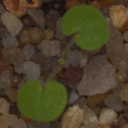

In [7]:
#randomly checking 5th image using cv2_imshow
cv2_imshow(seed_image[5])

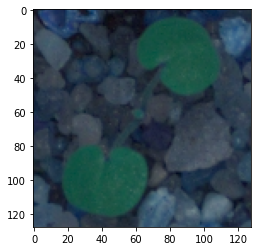

In [8]:
#checking the same image using matplotlib
plt.imshow(seed_image[5])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- So we will convert these BGR images to RGB images so we could interpret them easily.

In [9]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(seed_image)):
  seed_image[i] = cv2.cvtColor(seed_image[i], cv2.COLOR_BGR2RGB)

Lets' check the same image now using matplotlib

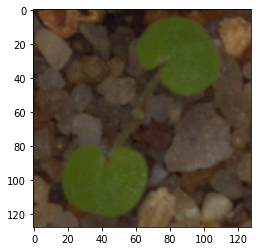

In [10]:
#checking the same image using matplotlib
plt.imshow(seed_image[5])

Now the image looks like the original image as seen using OpenCV

### **Exploratory Data Analysis**

Randomly viewing 20 seed images with their respective labels.

In [11]:
def plot_images(seed_image,seed_label):
  num_classes=12                                                                # Number of Classes
  categories=np.unique(seed_label)   
  keys=dict(seed_label['Label'])                                                # Obtaing the unique classes from y_train
  rows = 4                                                                      # Defining number of rows=4
  cols = 5                                                                      # Defining number of columns=5
  fig = plt.figure(figsize=(15, 12))                                            # Defining the figure size to 15x12
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(seed_label))                  # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                    # Adding subplots with 4 rows and 5 columns
          ax.imshow(seed_image[random_index, :])                                # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

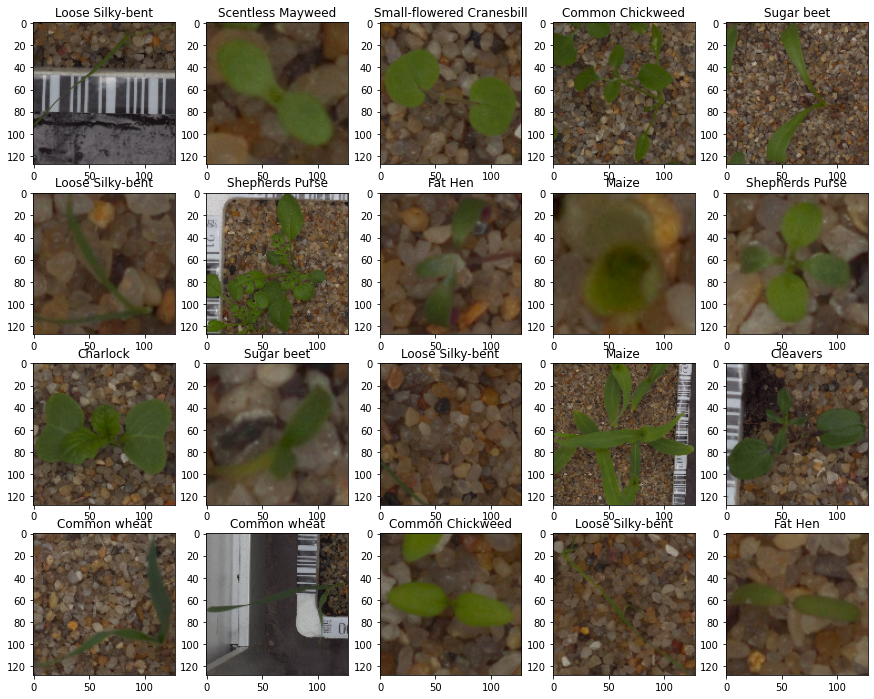

In [12]:
plot_images(seed_image,seed_label)

We see that some images are captured from a distance and hence lots of stones/pebbles are there in the image while few are clicked using close-up. Also, few images have barcode in the image captured. This can lead to some noise in the image recognition process.

Lets check for the distribution of the 12 classes in the data below.

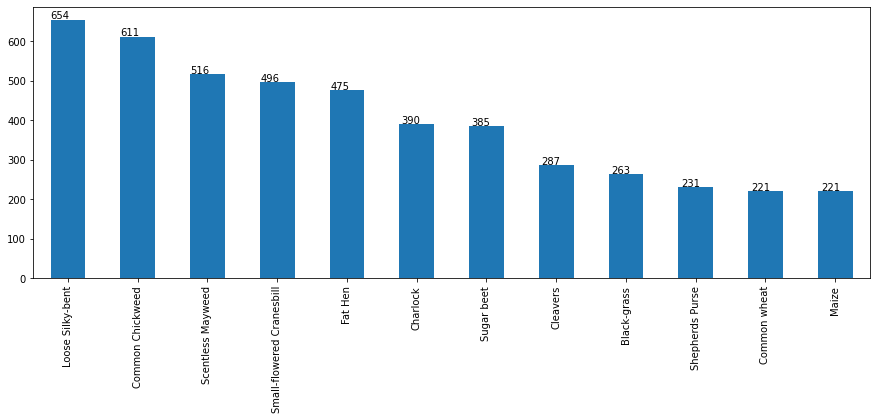

In [13]:
plt.figure(figsize=(15,5))
ax = seed_label['Label'].value_counts().plot(kind="bar")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

All the classes of the different seeds are not equally distributed in the image data. WHile Loose Silky-bent & Common CHickweed have 600+ images, Common Wheat, Maize has only ~220 images. We do not have a balanced image dataset for all the seeds 

### **Resizing Images** 
As the size of the images is large (128 X 128 X 3), it may be computationally expensive to train on these larger images; therefore, we will reduce the image size from 128 to 64.

In [14]:
seed_image_resized=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(seed_image)):
  seed_image_resized.append(cv2.resize(seed_image[i], dimensions, interpolation=cv2.INTER_LINEAR))

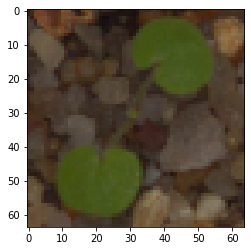

In [15]:
#checking the same image using matplotlib
plt.imshow(seed_image_resized[5])

## **Gaussian Blurring**

Gaussian Blurring sometimes helps better extracting image features, here we do Gaussian Blurring and check the same image.

In [16]:
# Applying Gaussian Blur to remove noise the images
images_gb=[]
for i in range(len(seed_image_resized)):
  # gb[i] = cv2.cvtColor(seed_image_resized[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(seed_image_resized[i], ksize =(3,3),sigmaX =  0))

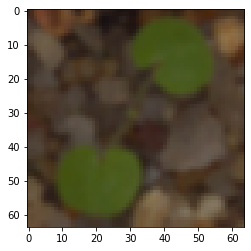

In [17]:
# Checking the same image
plt.imshow(images_gb[5])

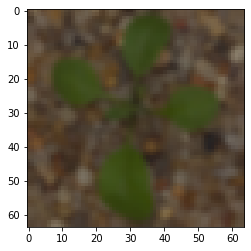

In [18]:
# Viewing one more image randomly
plt.imshow(images_gb[1024])

The image already was blurred, there is no much difference we see after blurring the image above. We will for now park this here and not use the blurred image for our model building. 

## **Splitting the dataset**

- Splitting the data into train, test & Validation - We will only use 20% of our data for testing, 20% of our data for validation and 60% of our data for training.


In [19]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(seed_image_resized),seed_label , test_size=0.2, random_state=42,stratify=seed_label)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.2, random_state=42,stratify=y_temp)


In [20]:
print("Shape of Train data")
print(X_train.shape)
print(y_train.shape)
print(" ")
print("Shape of Validation data")
print(X_val.shape)
print(y_val.shape)
print(" ")
print("Shape of Test data")
print(X_test.shape)
print(y_test.shape)

Shape of Train data
(3040, 64, 64, 3)
(3040, 1)
 
Shape of Validation data
(760, 64, 64, 3)
(760, 1)
 
Shape of Test data
(950, 64, 64, 3)
(950, 1)


Before we start building our model, we will make the data compatible by Encoding the target variable and normalising the image

###Encoding the target labels

In [21]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

### Normalisation

 **Image pixel values range from 0-255**, we will scale the pixels and just **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [22]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## **Model Building - Convolutional Neural Network (CNN)**
Let's create a CNN model sequentially, where we will be adding the layers one after another. 
Broadly there will be two major layers in the CNN model

1. **The Feature Extraction layers** comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>

Since this is a classification problem, we will aim at Categorical Crossentropy as our loss function and Accuracy metrics to be maximised.

Before we start developing the model, a generic definition to plot the confusion metrics of the models which would also show the Recall, Accuracy, Precision and F1 score for each of the model

In [23]:
#To get classification report
from sklearn.metrics import classification_report

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        if len(cf)==12:
            #Metrics for Confusion Matrices
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
        else:
            stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

## **Model 1**
- 3 Convolution layer with 128, 64 & 32 Neurons + Padding
- Each convolutional layer followed by a Pooling layer
- Fully connected layer with 32 neurons , Adam Optimiser
- Model compilation with 25 epochs & 32 batch size

In [24]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [25]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding second conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding third conv layer with 32 filters and kernel size 3x3 , padding 'same'  followed by a pooling layer
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 32 neurons    
model1.add(Dense(32, activation='relu'))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model1.add(Dense(12, activation='softmax'))

opt=Adam()
# Compile model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

In [26]:
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=25,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/25
95/95 - 60s - loss: 2.4376 - accuracy: 0.1368 - val_loss: 2.3653 - val_accuracy: 0.1684 - 60s/epoch - 634ms/step
Epoch 2/25
95/95 - 61s - loss: 2.1043 - accuracy: 0.2875 - val_loss: 1.8860 - val_accuracy: 0.3474 - 61s/epoch - 644ms/step
Epoch 3/25
95/95 - 58s - loss: 1.7373 - accuracy: 0.4020 - val_loss: 1.5912 - val_accuracy: 0.4263 - 58s/epoch - 612ms/step
Epoch 4/25
95/95 - 62s - loss: 1.4810 - accuracy: 0.4681 - val_loss: 1.4451 - val_accuracy: 0.4895 - 62s/epoch - 657ms/step
Epoch 5/25
95/95 - 58s - loss: 1.2757 - accuracy: 0.5622 - val_loss: 1.2423 - val_accuracy: 0.5803 - 58s/epoch - 606ms/step
Epoch 6/25
95/95 - 58s - loss: 1.1219 - accuracy: 0.6118 - val_loss: 1.2073 - val_accuracy: 0.5947 - 58s/epoch - 614ms/step
Epoch 7/25
95/95 - 58s - loss: 1.0054 - accuracy: 0.6503 - val_loss: 1.1114 - val_accuracy: 0.6132 - 58s/epoch - 607ms/step
Epoch 8/25
95/95 - 58s - loss: 0.9053 - accuracy: 0.6888 - val_loss: 1.0790 - val_accuracy: 0.6447 - 58s/epoch - 606ms/step
Epoch 9/

**Model 1** : Train accuracy is ~93% which is good, but the Validation accuracy is 73% hence we do see overfitting here 

We will populate the accuracy curves below and als ocheck the performance on our test data.

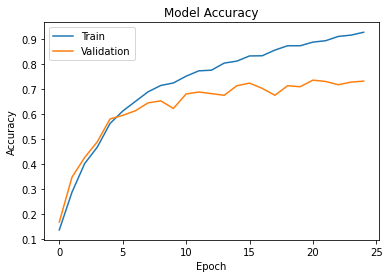

In [27]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Overfitting is cleat as we increase the epochs

In [28]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 4s - loss: 1.3175 - accuracy: 0.7358 - 4s/epoch - 140ms/step


              precision    recall  f1-score   support

           0       0.35      0.30      0.32        53
           1       0.77      0.86      0.81        78
           2       0.78      0.79      0.79        58
           3       0.93      0.81      0.86       122
           4       0.59      0.50      0.54        44
           5       0.70      0.78      0.74        95
           6       0.67      0.73      0.70       131
           7       0.78      0.73      0.75        44
           8       0.72      0.81      0.76       103
           9       0.68      0.61      0.64        46
          10       0.87      0.84      0.86        99
          11       0.73      0.70      0.72        77

    accuracy                           0.74       950
   macro avg       0.71      0.70      0.71       950
weighted avg       0.74      0.74      0.73       950



<Figure size 1080x720 with 0 Axes>

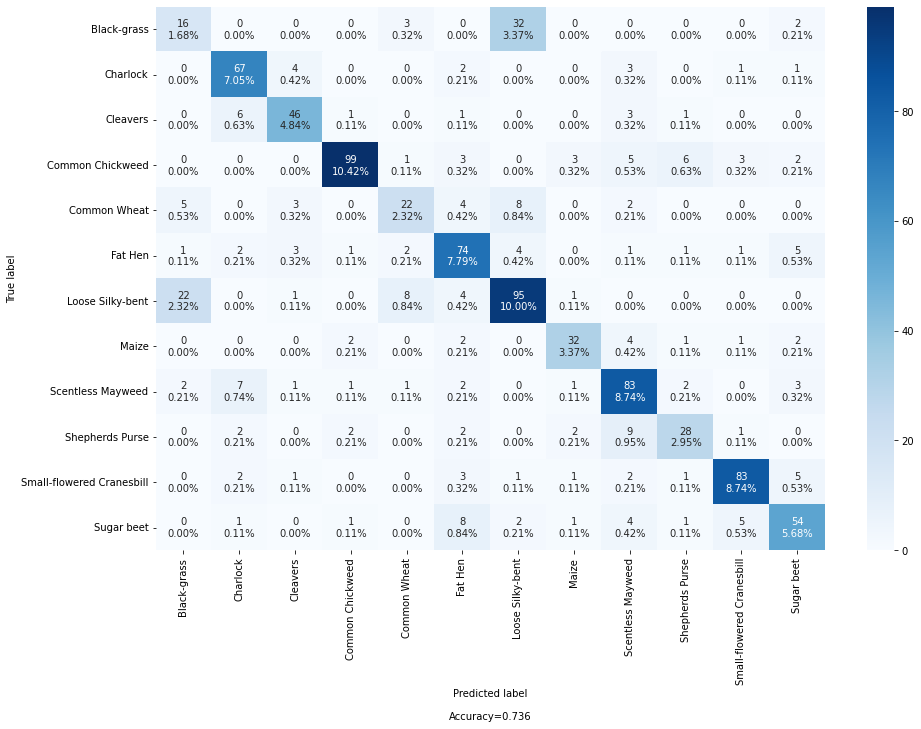

In [32]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)

y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

print(classification_report(y_test_arg, y_pred_arg))
plt.figure(figsize = (15, 10))

#importing accuracy_score, precision_score, recall_score, f1_score

cm2=confusion_matrix(y_test_arg, y_pred_arg)
categories = [ 'Black-grass','Charlock','Cleavers','Common Chickweed','Common Wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed',
'Shepherds Purse','Small-flowered Cranesbill','Sugar beet']
make_confusion_matrix(cm2, 
                      categories=categories, 
                      figsize=(15, 10),
                      cmap='Blues')

**Model1 Comments** : Above results shows 74% accuracy on the test data and a weighted recall of 74%. ALso, from the confusion metrics we see that some od the seeds are miss classified - a good percentage of Black Grass is mis-classified as Loose Silky-bent and vice-versa. Similarly, Loose Silky-bent and common wheat also has shown some miss-classification.

Lets try another model

______________________________________________________________________________________________________________________________________________________

## **Model 2**
- 4 Convolution layer with 128, 64, 64 & 32 Neurons + Padding
- Each convolutional layer followed by a Pooling layer
- Fully connected layer with 64 neurons , Adam Optimiser
- 30% dropout
- Model compilation with 20 epochs & 32 batch size

In [36]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [37]:
# Intializing a sequential model
model2 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model2.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding second conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding third conv layer with 32 filters and kernel size 3x3 , padding 'same'  followed by a pooling layer
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding third conv layer with 32 filters and kernel size 3x3 , padding 'same'  followed by a pooling layer
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 32 neurons    
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model2.add(Dense(12, activation='softmax'))

opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [38]:
history_2 = model2.fit(
            X_train_normalized, y_train_encoded,
            epochs=20,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/20
95/95 - 65s - loss: 2.4398 - accuracy: 0.1227 - val_loss: 2.4189 - val_accuracy: 0.1382 - 65s/epoch - 685ms/step
Epoch 2/20
95/95 - 61s - loss: 2.4226 - accuracy: 0.1418 - val_loss: 2.3050 - val_accuracy: 0.2408 - 61s/epoch - 640ms/step
Epoch 3/20
95/95 - 61s - loss: 2.0887 - accuracy: 0.2891 - val_loss: 1.8040 - val_accuracy: 0.3776 - 61s/epoch - 637ms/step
Epoch 4/20
95/95 - 60s - loss: 1.7442 - accuracy: 0.3977 - val_loss: 1.6354 - val_accuracy: 0.4434 - 60s/epoch - 637ms/step
Epoch 5/20
95/95 - 60s - loss: 1.4823 - accuracy: 0.4826 - val_loss: 1.2791 - val_accuracy: 0.5513 - 60s/epoch - 637ms/step
Epoch 6/20
95/95 - 60s - loss: 1.3108 - accuracy: 0.5372 - val_loss: 1.1551 - val_accuracy: 0.5934 - 60s/epoch - 634ms/step
Epoch 7/20
95/95 - 60s - loss: 1.1762 - accuracy: 0.5928 - val_loss: 1.0656 - val_accuracy: 0.6303 - 60s/epoch - 634ms/step
Epoch 8/20
95/95 - 60s - loss: 1.0797 - accuracy: 0.6263 - val_loss: 1.0123 - val_accuracy: 0.6421 - 60s/epoch - 633ms/step
Epoch 9/

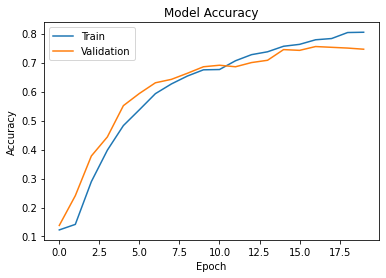

In [39]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 7s - loss: 0.8358 - accuracy: 0.7432 - 7s/epoch - 229ms/step


              precision    recall  f1-score   support

           0       0.33      0.06      0.10        53
           1       0.78      0.92      0.85        78
           2       0.88      0.76      0.81        58
           3       0.87      0.91      0.89       122
           4       0.54      0.34      0.42        44
           5       0.82      0.84      0.83        95
           6       0.67      0.90      0.77       131
           7       0.63      0.73      0.67        44
           8       0.66      0.67      0.66       103
           9       0.85      0.48      0.61        46
          10       0.90      0.83      0.86        99
          11       0.60      0.75      0.67        77

    accuracy                           0.74       950
   macro avg       0.71      0.68      0.68       950
weighted avg       0.73      0.74      0.72       950



<Figure size 1080x720 with 0 Axes>

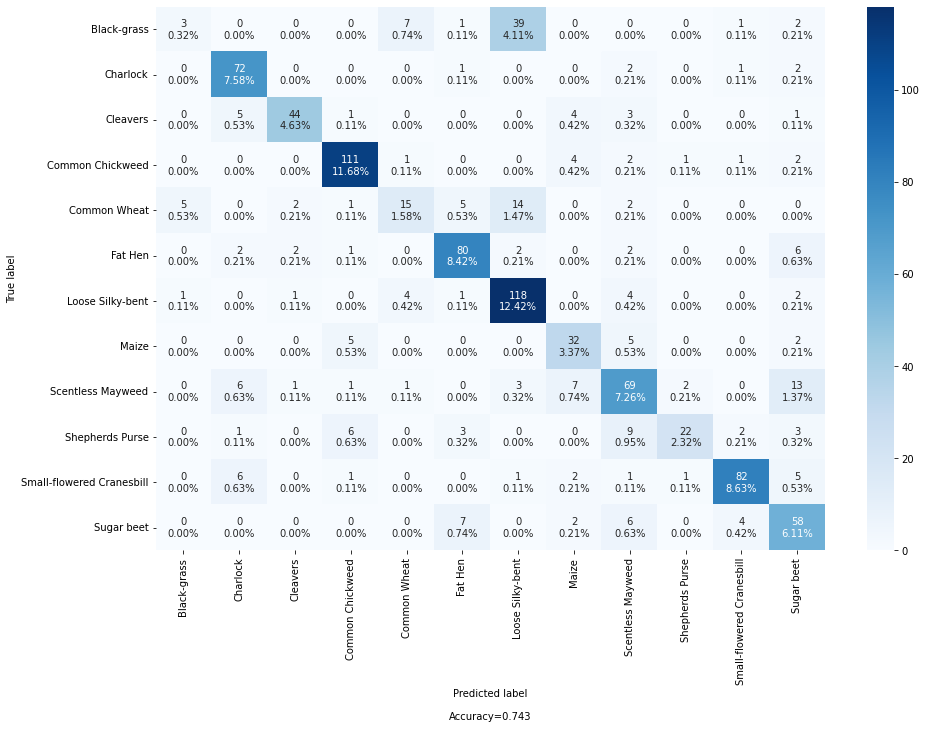

In [41]:
# Here we would get the output as probablities for each category
y_pred=model2.predict(X_test_normalized)

y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

print(classification_report(y_test_arg, y_pred_arg))
plt.figure(figsize = (15, 10))

#importing accuracy_score, precision_score, recall_score, f1_score

cm2=confusion_matrix(y_test_arg, y_pred_arg)
categories = [ 'Black-grass','Charlock','Cleavers','Common Chickweed','Common Wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed',
'Shepherds Purse','Small-flowered Cranesbill','Sugar beet']
make_confusion_matrix(cm2, 
                    categories=categories, 
                    figsize=(15, 10),
                    cmap='Blues')

**Model 2 Comments** : Train accuracy is ~80% and the validation accuracy is also close 75%, overfitting in this model is less compared to Model1. Test accuray stays at 74%. 

CLass 0 (Black-grass) continues to be badly classified, infact has deteriorated compared to Model1


## **Model 3 (Data Augmentation)**

We will try for some data augmentation to improve our model performance. 
Also, increasing the number of neurons in the fully connected layer and decreasing the batch size

- 4 Convolution layer with 128, 64, 64 & 32 Neurons + Padding
- Each convolutional layer followed by a Pooling layer
- Fully connected layer with 128 neurons , Adam Optimiser
- 30% dropout
- Model compilation with 20 epochs & 20 batch size

In [57]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [58]:
train_datagen = ImageDataGenerator(horizontal_flip = True,
                              vertical_flip = False, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                              zoom_range=0.1)

In [59]:
# Intializing a sequential model
model3 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model3.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding second conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
model3.add(Conv2D(64, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding third conv layer with 32 filters and kernel size 3x3 , padding 'same'  followed by a pooling layer
model3.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model3.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding third conv layer with 32 filters and kernel size 3x3 , padding 'same'  followed by a pooling layer
model3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model3.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model3.add(Flatten())

# Adding a fully connected dense layer with 32 neurons    
model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model3.add(Dense(12, activation='softmax'))

opt=Adam()
# Compile model
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [60]:
# Epochs
epochs = 20
# Batch size
batch_size = 20

history_3 = model3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
152/152 [==============================] - 71s 466ms/step - loss: 2.4401 - accuracy: 0.1237 - val_loss: 2.4173 - val_accuracy: 0.1789
Epoch 2/20
152/152 [==============================] - 66s 434ms/step - loss: 2.2731 - accuracy: 0.2092 - val_loss: 1.9418 - val_accuracy: 0.3224
Epoch 3/20
152/152 [==============================] - 66s 432ms/step - loss: 1.8476 - accuracy: 0.3474 - val_loss: 1.6472 - val_accuracy: 0.4171
Epoch 4/20
152/152 [==============================] - 65s 430ms/step - loss: 1.6831 - accuracy: 0.4066 - val_loss: 1.4895 - val_accuracy: 0.4842
Epoch 5/20
152/152 [==============================] - 65s 430ms/step - loss: 1.5219 - accuracy: 0.4668 - val_loss: 1.3189 - val_accuracy: 0.5184
Epoch 6/20
152/152 [==============================] - 65s 429ms/step - loss: 1.4193 - accuracy: 0.5026 - val_loss: 1.2022 - val_accuracy: 0.5842
Epoch 7/20
152/152 [==============================] - 67s 442ms/step - loss: 1.3159 - accuracy: 0.5391 - val_loss: 1.1884 - val_ac

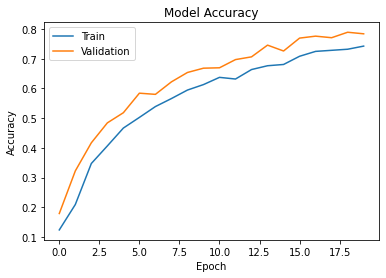

In [61]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [62]:
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 5s - loss: 0.6525 - accuracy: 0.7853 - 5s/epoch - 150ms/step


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.76      0.95      0.84        78
           2       0.86      0.62      0.72        58
           3       0.94      0.95      0.95       122
           4       0.92      0.25      0.39        44
           5       0.89      0.85      0.87        95
           6       0.61      0.97      0.75       131
           7       0.89      0.77      0.83        44
           8       0.67      0.85      0.75       103
           9       0.72      0.61      0.66        46
          10       0.94      0.86      0.90        99
          11       0.84      0.86      0.85        77

    accuracy                           0.79       950
   macro avg       0.75      0.71      0.71       950
weighted avg       0.77      0.79      0.76       950



<Figure size 1080x720 with 0 Axes>

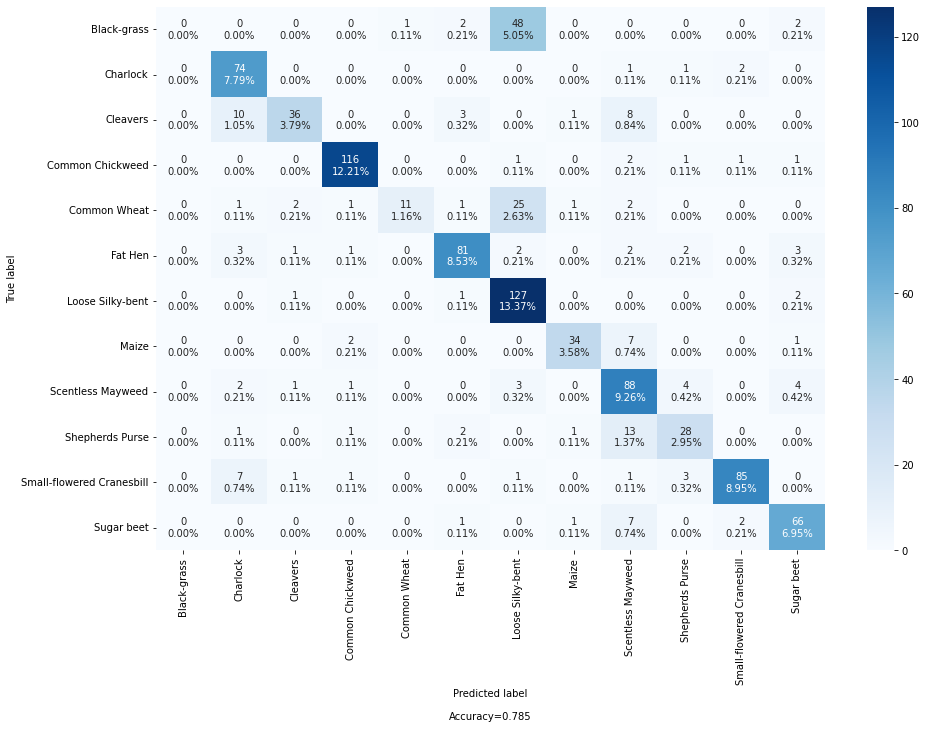

In [63]:
# Here we would get the output as probablities for each category
y_pred=model3.predict(X_test_normalized)

y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

print(classification_report(y_test_arg, y_pred_arg))
plt.figure(figsize = (15, 10))

#importing accuracy_score, precision_score, recall_score, f1_score

cm2=confusion_matrix(y_test_arg, y_pred_arg)
categories = [ 'Black-grass','Charlock','Cleavers','Common Chickweed','Common Wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed',
'Shepherds Purse','Small-flowered Cranesbill','Sugar beet']
make_confusion_matrix(cm2, 
                    categories=categories, 
                    figsize=(15, 10),
                    cmap='Blues')

**Model 3 Comments** : Train accuracy is ~74% and the validation accuracy is also close 78%, this is slightly under-fit model. 

CLass 0 (Black-grass) continues to be badly classified, infact has worsev compared to both Model1 & Model2, but for all the other classes the prediction has improved, with overall test accuracy at 79%. Also, overall model Recall & Precision has also improved. 

Now, we will try to use some Transfer Learning and use the veights from the VGG16 model and see if it can be leveraged to improve our model results.

In [73]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [74]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [75]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [76]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(128, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2

In [77]:
history_vgg16 = new_model.fit(
            X_train_normalized, y_train_encoded,
            epochs=20,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/20
95/95 - 172s - loss: 2.2762 - accuracy: 0.2161 - val_loss: 1.9308 - val_accuracy: 0.3487 - 172s/epoch - 2s/step
Epoch 2/20
95/95 - 163s - loss: 1.8397 - accuracy: 0.3595 - val_loss: 1.6061 - val_accuracy: 0.4368 - 163s/epoch - 2s/step
Epoch 3/20
95/95 - 161s - loss: 1.6160 - accuracy: 0.4151 - val_loss: 1.5210 - val_accuracy: 0.4658 - 161s/epoch - 2s/step
Epoch 4/20
95/95 - 161s - loss: 1.4893 - accuracy: 0.4622 - val_loss: 1.4134 - val_accuracy: 0.5158 - 161s/epoch - 2s/step
Epoch 5/20
95/95 - 161s - loss: 1.3723 - accuracy: 0.5105 - val_loss: 1.3459 - val_accuracy: 0.5276 - 161s/epoch - 2s/step
Epoch 6/20
95/95 - 160s - loss: 1.3032 - accuracy: 0.5352 - val_loss: 1.2642 - val_accuracy: 0.5513 - 160s/epoch - 2s/step
Epoch 7/20
95/95 - 160s - loss: 1.2084 - accuracy: 0.5651 - val_loss: 1.2868 - val_accuracy: 0.5553 - 160s/epoch - 2s/step
Epoch 8/20
95/95 - 160s - loss: 1.1514 - accuracy: 0.5849 - val_loss: 1.2232 - val_accuracy: 0.5684 - 160s/epoch - 2s/step
Epoch 9/20
95/95

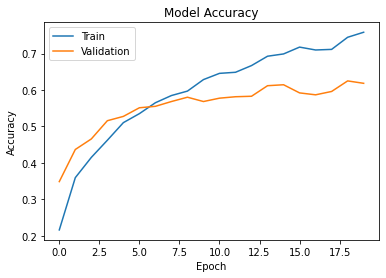

In [78]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [79]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 47s - loss: 1.1962 - accuracy: 0.6158 - 47s/epoch - 2s/step


              precision    recall  f1-score   support

           0       0.50      0.28      0.36        53
           1       0.62      0.63      0.62        78
           2       0.61      0.66      0.63        58
           3       0.71      0.78      0.75       122
           4       0.61      0.50      0.55        44
           5       0.55      0.31      0.39        95
           6       0.62      0.88      0.73       131
           7       0.70      0.64      0.67        44
           8       0.54      0.68      0.60       103
           9       0.43      0.13      0.20        46
          10       0.62      0.72      0.67        99
          11       0.64      0.61      0.62        77

    accuracy                           0.62       950
   macro avg       0.60      0.57      0.57       950
weighted avg       0.60      0.62      0.60       950



<Figure size 1080x720 with 0 Axes>

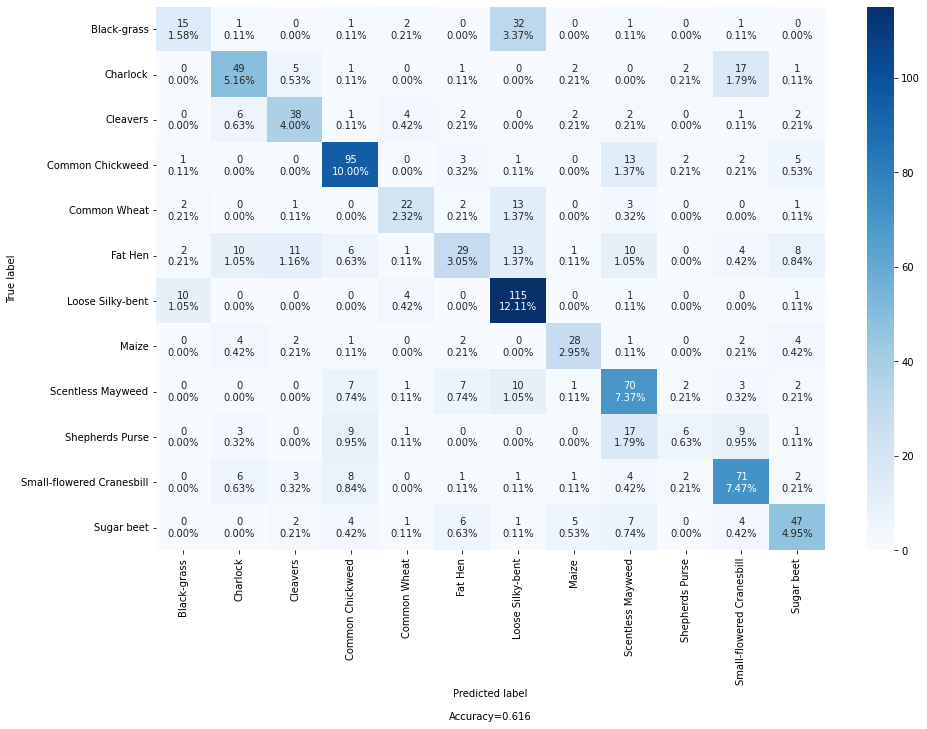

In [80]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

print(classification_report(y_test_arg, y_pred_arg))
plt.figure(figsize = (15, 10))

#importing accuracy_score, precision_score, recall_score, f1_score

cm2=confusion_matrix(y_test_arg, y_pred_arg)
categories = [ 'Black-grass','Charlock','Cleavers','Common Chickweed','Common Wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed',
'Shepherds Purse','Small-flowered Cranesbill','Sugar beet']
make_confusion_matrix(cm2, 
                    categories=categories, 
                    figsize=(15, 10),
                    cmap='Blues')

**Model 4 (VGG16) Comments** : Train accuracy is ~76% and the validation accuracy is also close 72%, However, the test data accuracy is very low at 62%. 

CLass 0 (Black-grass) has beeter prediction in this model. Though, there is still high level of mis-classification but it is better than previous models, but we see higher miss-classificaiton for other seeds images compared to previous models.


## **Conclusion & Recommendation**

On comparing all the 4 models tried above, we go with Model # 3 - where the CNN model was developed on the augmented data. This model has shown higher accuracy on the Test data with no over-fitting.

For one class (Class 0 i.e. Black Grass) - recommend to treat this separately and use some data augmentation technique only for this class to train the model. It might help in addressing the mis-classification issue for this class.